In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from torch.utils.data.dataset import TensorDataset
from torch.utils.data import DataLoader



In [2]:
def func(x1_,x2_):
    if x1_ < 0:
        x1 = 2*( (x1_+1)*2-1 )
        x2 = 2*x2_
        return 3*x1*x2*np.exp(-x1**2-x2**2)-0.5
    else:
        x1 = 5*( x1_*2-1 )
        x2 = 5*x2_
        return np.sin(np.sqrt(x1**2+x2**2))

In [3]:
func(0.22,0.75)

-0.9994758687454649

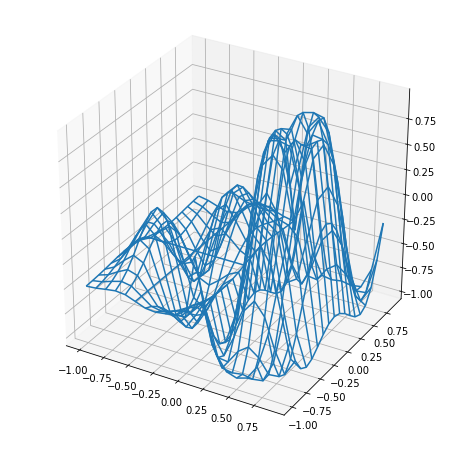

In [6]:
X1_ = np.arange(-1, 1, 0.1)
X2_ = np.arange(-1, 1, 0.1)
X1, X2 = np.meshgrid(X1_, X2_)
Y = np.zeros(X1.shape)
for i, x1_i in enumerate(X1_):
    for j, x2_i in enumerate(X2_):
        Y[j][i] = func(x1_i, x2_i)
fig  = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_wireframe(X1, X2, Y)
plt.show()


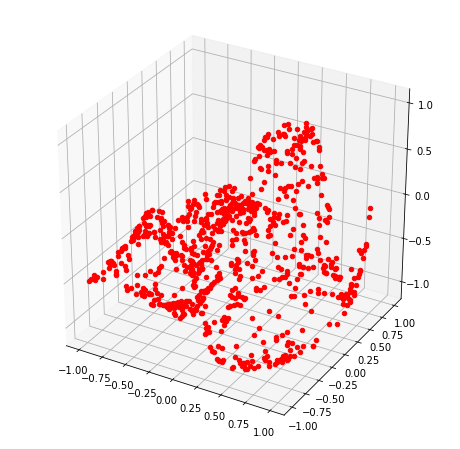

In [7]:
x1x2 = np.random.rand(10000,2)*2.0-1.0
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1,projection='3d')
for samp in x1x2[:800]:
    ax.scatter(samp[0],samp[1],func(samp[0],samp[1]),c='r')
plt.show()

In [8]:
df = pd.DataFrame(x1x2, columns=['x1','x2'])
df['X'] = [ np.array([x1,x2]) for  x1,x2 in zip(df.x1,df.x2)  ]
df['y'] = [ func(x1,x2) for x1,x2 in zip(df.x1,df.x2) ]
df = df.drop('x1',axis=1).drop('x2',axis=1)
df


,X,y
0,"[0.5370293411117437, -0.9956269848231658]",-0.961194
1,"[-0.3340779839623842, -0.5516892311846537]",-0.918583
2,"[0.6609521984064701, -0.08050954964298307]",0.996104
3,"[-0.5090221020951327, -0.48579268289577726]",-0.459127
4,"[-0.74800530799639, -0.874287360424097]",-0.408573
...,...,...
9995,"[-0.4884038474972008, 0.8262014917200635]",-0.485042
9996,"[-0.84259551987155, 0.15743655552912084]",-0.679250
9997,"[-0.12589819701070692, 0.8664142189617223]",-0.458848
9998,"[0.9005724450458916, 0.5023234326411221]",-0.999878


In [9]:
x = torch.FloatTensor([3.8,4.2])
print('x.shape ',x.shape)
print('x[0] ', x[0])
print('x[1] ', x[1])

x.shape  torch.Size([2])
x[0]  tensor(3.8000)
x[1]  tensor(4.2000)


In [11]:
len_train = 9000
x_full = torch.FloatTensor(df.X)
y_full = torch.FloatTensor(df.y).view(len(df),1)

x_train = x_full[:len_train]
y_train = y_full[:len_train]

x_valid = x_full[len_train:]
y_valid = y_full[len_train:]
x_train.shape


torch.Size([9000, 2])

In [12]:
y_train.shape

torch.Size([9000, 1])

In [13]:
train_ds = TensorDataset(x_train,y_train)
valid_ds = TensorDataset(x_valid,y_valid)

In [14]:
train_ds[52]

(tensor([0.5524, 0.2695]), tensor([0.9922]))

In [15]:
dataloader = DataLoader(train_ds,batch_size=10, shuffle = True)


In [16]:
for x,y in dataloader:
    break
print(x.shape, y.shape)


torch.Size([10, 2]) torch.Size([10, 1])


In [18]:
first_layer = nn.Linear(2,10)
x = torch.FloatTensor([3.8, 2.1])
first_layer(x)



tensor([ 0.9569,  0.5621,  1.3428,  1.3043,  1.7807, -1.0091, -0.9177, -1.7532,
        -1.2418, -2.3123], grad_fn=<AddBackward0>)

In [19]:
activation1 = nn.ReLU()
activation1(first_layer(x))

tensor([0.9569, 0.5621, 1.3428, 1.3043, 1.7807, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000], grad_fn=<ReluBackward0>)

In [20]:
layer2 = nn.Linear(10,1)
layer2(activation1(first_layer(x)))

tensor([-0.5784], grad_fn=<AddBackward0>)

In [21]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.layer1 = nn.Linear(2,10)
        self.layer2 = nn.Linear(10,1)
        self.activation1 = nn.ReLU()
        self.activation2 = nn.Tanh()
    def forward(self, x):
        out = self.layer1(x)
        out = self.activation1(out)
        out = self.layer2(out)
        out = self.activation2(out)
        return out


In [22]:
net = Net()

In [24]:
x = torch.FloatTensor([[0.2,0.3],[0.4,0.6],[0.8,-0.2]])

In [25]:
x

tensor([[ 0.2000,  0.3000],
        [ 0.4000,  0.6000],
        [ 0.8000, -0.2000]])

In [26]:
net(x)

tensor([[-0.1812],
        [-0.1786],
        [-0.3451]], grad_fn=<TanhBackward0>)

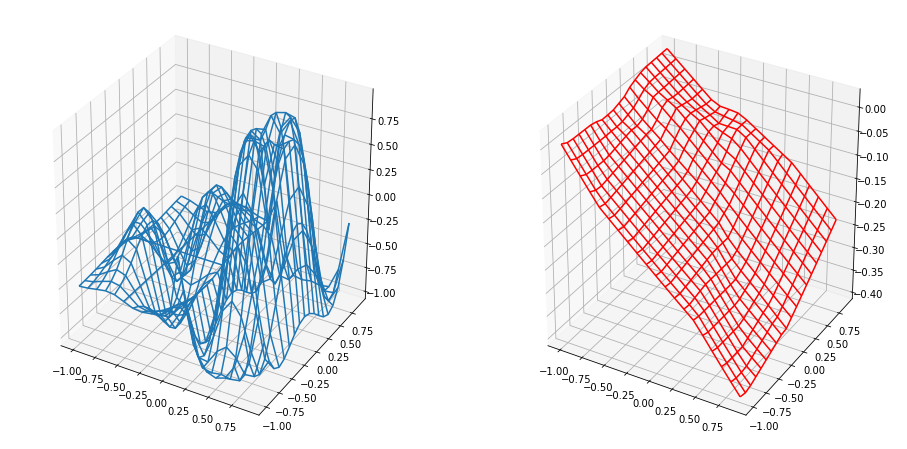

In [27]:
X1_ = np.arange(-1, 1, 0.1)
X2_ = np.arange(-1, 1, 0.1)
X1, X2 = np.meshgrid(X1_, X2_)

fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot_wireframe(X1, X2, Y)

ax2 = fig.add_subplot(1,2,2,projection='3d')    
x1 = np.arange(-1, 1, 0.1)
x2 = np.arange(-1, 1, 0.1)
Yprime = np.zeros(Y.shape)
for i, x1_i in enumerate(x1):
    for j, x2_i in enumerate(x2):
        input_i = torch.FloatTensor([x1_i,x2_i])
        y_i = net(input_i)
        
        Yprime[j][i] = y_i
ax2.plot_wireframe(X1,X2,Yprime,color='r')


plt.show()

In [28]:
loss_func = nn.MSELoss()

In [29]:
target = torch.tensor([4.1])
prediction = torch.tensor([4.2])
loss_func(target,prediction)

tensor(0.0100)

In [30]:
import torch.optim as optim
optimizer = optim.Adam(net.parameters(), lr=0.0005) 

In [31]:
from tqdm.notebook import tqdm

for epoch in tqdm( range(20) ):
    for x,y in dataloader:
        optimizer.zero_grad()
        
        output = net(x)
        loss = loss_func(y,output)
        
        loss.backward()  
        optimizer.step()

  0%|          | 0/20 [00:00<?, ?it/s]

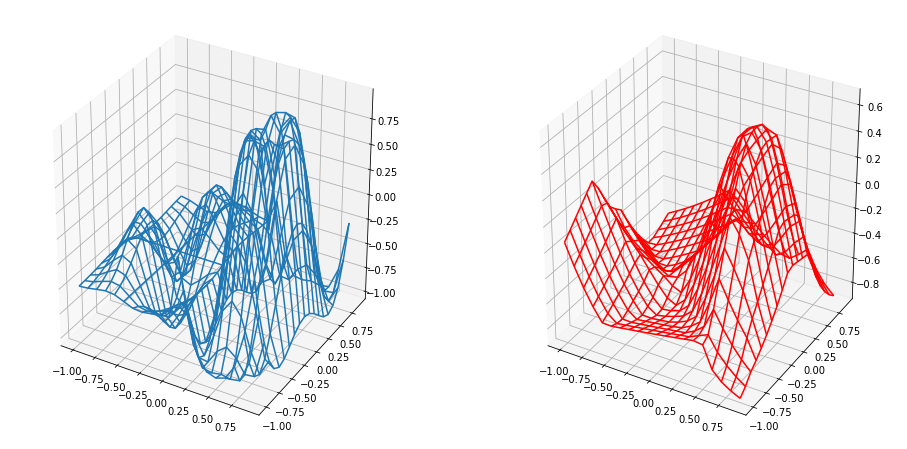

In [32]:
X1_ = np.arange(-1, 1, 0.1)
X2_ = np.arange(-1, 1, 0.1)
X1, X2 = np.meshgrid(X1_, X2_)

fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot_wireframe(X1, X2, Y)

ax2 = fig.add_subplot(1,2,2,projection='3d')    
x1 = np.arange(-1, 1, 0.1)
x2 = np.arange(-1, 1, 0.1)
Yprime = np.zeros(Y.shape)
for i, x1_i in enumerate(x1):
    for j, x2_i in enumerate(x2):
        input_i = torch.FloatTensor([x1_i,x2_i])
        y_i = net(input_i)
        
        Yprime[j][i] = y_i
ax2.plot_wireframe(X1,X2,Yprime,color='r')


plt.show()


In [33]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
        self.layer1 = nn.Linear(2,100)
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(100,50)
        self.layer3 = nn.Linear(50,10)
        self.layer4 = nn.Linear(10,1)
        self.activation2 = nn.Tanh()
        
    def forward(self,x):
        
        out = self.layer1(x)
        out = self.activation1(out)
        out = self.layer2(out)
        out = self.activation1(out)
        out = self.layer3(out)
        out = self.activation1(out)
        out = self.layer4(out)
        out = self.activation2(out)
        
        return out
    
net = Net()

In [34]:
optimizer = optim.Adam(net.parameters(), lr=0.01) 

In [35]:
from tqdm.notebook import tqdm

for epoch in tqdm( range(20) ):
    for x,y in dataloader:
        optimizer.zero_grad()
        
        output = net(x)
        loss = loss_func(y,output)
        
        loss.backward()  
        optimizer.step()

  0%|          | 0/20 [00:00<?, ?it/s]

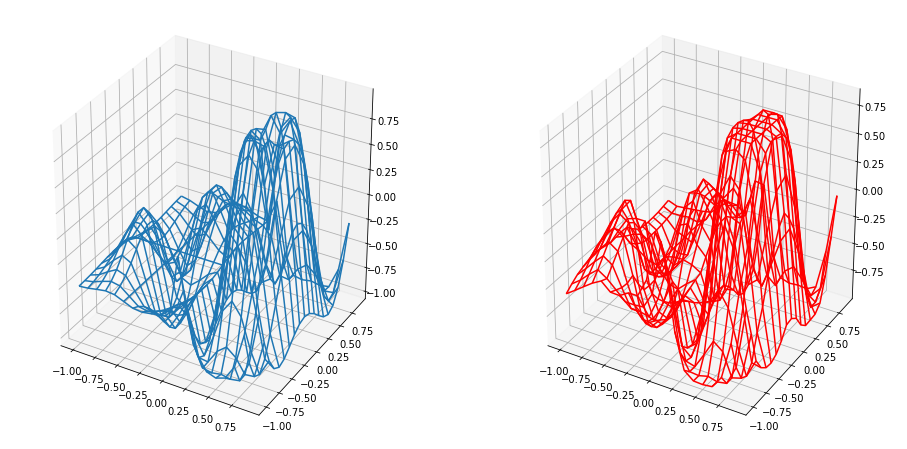

In [36]:
X1_ = np.arange(-1, 1, 0.1)
X2_ = np.arange(-1, 1, 0.1)
X1, X2 = np.meshgrid(X1_, X2_)

fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(1,2,1,projection='3d')
ax.plot_wireframe(X1, X2, Y)

ax2 = fig.add_subplot(1,2,2,projection='3d')    
x1 = np.arange(-1, 1, 0.1)
x2 = np.arange(-1, 1, 0.1)
Yprime = np.zeros(Y.shape)
for i, x1_i in enumerate(x1):
    for j, x2_i in enumerate(x2):
        input_i = torch.FloatTensor([x1_i,x2_i])
        y_i = net(input_i)
        
        Yprime[j][i] = y_i
ax2.plot_wireframe(X1,X2,Yprime,color='r')


plt.show()